# Notebook to plot HNL constraints

This notebook computes some low-level quantities that might be of interest

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from particle import *
from particle import literals as lp

In [3]:
from hnl_apps import model
from hnl_apps import hnl_tools
from hnl_apps.plot_tools import *
from hnl_apps import exp
from hnl_apps.const import *

## Neutrino fluxes 

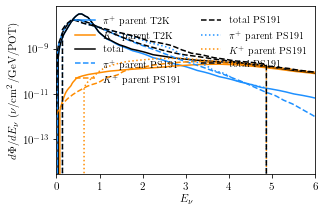

In [4]:
nd280 = exp.experiment(exp.flag_nd280)
fpi = nd280.get_flux_func(parent=lp.pi_plus)
fK = nd280.get_flux_func(parent=lp.K_plus)


ps191 = exp.experiment(exp.flag_ps191)
fpi_ps191 = ps191.get_flux_func(parent=lp.pi_plus)
fK_ps191 = ps191.get_flux_func(parent=lp.K_plus)

ps191_p = exp.experiment(exp.flag_ps191_proposal)
fpi_ps191_p = ps191_p.get_flux_func(parent=lp.pi_plus)
fK_ps191_p = ps191_p.get_flux_func(parent=lp.K_plus)

fig = plt.figure()
ax = fig.add_axes(axes_form)

x=np.linspace(0,20,1000)
ax.plot(x,fpi(x), label='$\pi^+$ parent T2K', c='dodgerblue')
ax.plot(x,fK(x), label='$K^+$ parent T2K', c='darkorange')
ax.plot(x,fpi(x) + fK(x), label='total', c='black')

ax.plot(x,fpi_ps191(x), label='$\pi^+$ parent PS191', ls='--', c='dodgerblue')
ax.plot(x,fK_ps191(x), label='$K^+$ parent PS191', ls='--', c='darkorange')
ax.plot(x,fpi_ps191(x) + fK_ps191(x), label='total PS191', ls='--', c='black')


ax.plot(x,fpi_ps191_p(x), label='$\pi^+$ parent PS191', ls=':', c='dodgerblue')
ax.plot(x,fK_ps191_p(x), label='$K^+$ parent PS191', ls=':', c='darkorange')
ax.plot(x,fpi_ps191_p(x) + fK_ps191_p(x), label='total PS191', ls='--', c='black')

# e,f=np.genfromtxt("hnl_apps/fluxes/ps191/numu_flux.dat",unpack=True)
# f *= 1/0.2/(3*6)/1e4/0.89e19
# ax.plot(e,f, c='orange')

ax.set_xlabel(r"$E_\nu$")
ax.set_ylabel(r"$d\Phi/dE_\nu$ ($\nu$/cm$^2$/GeV/POT)")
ax.set_yscale('log')
ax.legend(loc='upper right', frameon=False, ncol=2)
ax.patch.set_facecolor('None')
ax.set_xlim(0,6)
# ax.set_ylim(1e-11,1e-7)
fig.savefig("plots/ps191_nufluxes.png", dpi=400)


### Mean neutrino energy of PS191 and T2K

Average energy for nus in T2K from pi 0.854
Average energy for nus in T2K from K 3.9
Average energy for nus in PS191 from pi 1.02
Average energy for nus in PS191 from K 4.03


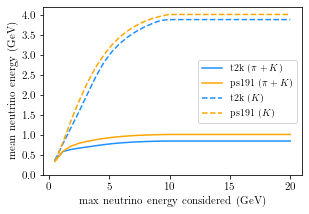

In [5]:
t2k_avg=[]
ps191_avg=[]
t2k_avg_pi=[]
ps191_avg_pi=[]
t2k_avg_K=[]
ps191_avg_K=[]

cuts = np.linspace(0.5,20,30)
for cut in cuts:
    x=np.linspace(0.05,cut,10000)
    t2k_avg.append(np.average(x,weights=fpi(x)+fK(x)))
    ps191_avg.append(np.average(x,weights=fpi_ps191(x)+fK_ps191(x)))

    t2k_avg_pi.append(np.average(x,weights=fpi(x)+fK(x)))
    ps191_avg_pi.append(np.average(x,weights=fpi_ps191(x)+fK_ps191(x)))

    t2k_avg_K.append(np.average(x,weights=fK(x)))
    ps191_avg_K.append(np.average(x,weights=fK_ps191(x)))

    
fig = plt.figure()
ax = fig.add_axes(axes_form)
plt.plot(cuts, t2k_avg, label='t2k ($\pi+ K$)' , c='dodgerblue')
plt.plot(cuts, ps191_avg, label='ps191 ($\pi+ K$)' , c='orange')

plt.plot(cuts, t2k_avg_K, label='t2k ($K$)' , c='dodgerblue', ls='--')
plt.plot(cuts, ps191_avg_K, label='ps191 ($K$)' , c='orange', ls='--')

plt.legend(loc='center right')
plt.xlabel('max neutrino energy considered (GeV)')
plt.ylabel('mean neutrino energy (GeV)')


plt.yticks([0,0.5,1,1.5,2,2.5,3,3.5,4])
plt.savefig('plots/mean_energy_comparison.pdf')

print(f"Average energy for nus in T2K from pi {t2k_avg_pi[-1]:.3g}")
print(f"Average energy for nus in T2K from K {t2k_avg_K[-1]:.3g}")
print(f"Average energy for nus in PS191 from pi {ps191_avg_pi[-1]:.3g}")
print(f"Average energy for nus in PS191 from K {ps191_avg_K[-1]:.3g}")



In [6]:
print(f"Total neutrino flux at T2K: {np.sum(fpi(x)+fK(x))*(x[1]-x[0]):.4g} nus/cm^2/POT")
print(f"Total neutrino flux at T2K from pi+ only: {np.sum(fpi(x))*(x[1]-x[0]):.4g} nus/cm^2/POT")
print(f"Total neutrino flux at T2K from K+ only: {np.sum(fK(x))*(x[1]-x[0]):.4g} nus/cm^2/POT")

Total neutrino flux at T2K: 1.895e-08 nus/cm^2/POT
Total neutrino flux at T2K from pi+ only: 1.804e-08 nus/cm^2/POT
Total neutrino flux at T2K from K+ only: 9.134e-10 nus/cm^2/POT


In [7]:
print(f"Total neutrino flux at PS191: {np.sum(fpi_ps191(x)+fK_ps191(x))*(x[1]-x[0]):.4g} nus/cm^2/POT")
print(f"Total neutrino flux at PS191 from pi+ only: {np.sum(fpi_ps191(x))*(x[1]-x[0]):.4g} nus/cm^2/POT")
print(f"Total neutrino flux at PS191 from K+ only: {np.sum(fK_ps191(x))*(x[1]-x[0]):.4g} nus/cm^2/POT")

Total neutrino flux at PS191: 1.783e-08 nus/cm^2/POT
Total neutrino flux at PS191 from pi+ only: 1.682e-08 nus/cm^2/POT
Total neutrino flux at PS191 from K+ only: 1.018e-09 nus/cm^2/POT


## Shrock's Function

/Users/matheushostert/Repos/stdHNL/hnl_apps/const.py:150: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(kallen(a,b,c))
/Users/matheushostert/Repos/stdHNL/hnl_apps/const.py:150: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(kallen(a,b,c))
/Users/matheushostert/Repos/stdHNL/hnl_apps/const.py:150: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(kallen(a,b,c))


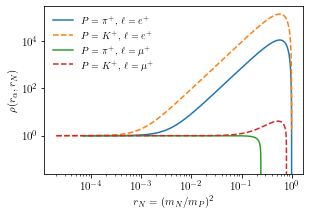

In [8]:
mN_K = np.logspace(-5,np.log10(lp.K_plus.mass/1e3),10000, endpoint=False)
mN_pi = np.logspace(-5,np.log10(lp.pi_plus.mass/1e3),10000, endpoint=False)

fig = plt.figure()
ax = fig.add_axes(axes_form)

ax.plot(mN_pi/(lp.pi_plus.mass/1e3), hnl_tools.get_Rapp(mN_pi, parent = lp.pi_plus, daughter = lp.e_plus), label=r'$P=\pi^+,\,\ell=e^+$')
ax.plot(mN_K/(lp.K_plus.mass/1e3), hnl_tools.get_Rapp(mN_K, parent = lp.K_plus, daughter = lp.e_plus), label=r'$P=K^+,\,\ell=e^+$',ls='--')

ax.plot(mN_pi/(lp.pi_plus.mass/1e3), hnl_tools.get_Rapp(mN_pi, parent = lp.pi_plus, daughter = lp.mu_plus), label=r'$P=\pi^+,\,\ell=\mu^+$')
ax.plot(mN_K/(lp.K_plus.mass/1e3), hnl_tools.get_Rapp(mN_K, parent = lp.K_plus, daughter = lp.mu_plus), label=r'$P=K^+,\,\ell=\mu^+$',ls='--')

ax.set_ylabel(r"$\rho(r_\alpha,r_N)$")
ax.set_xlabel(r"$r_N=(m_N/m_P)^2$")
ax.set_yscale("log")
ax.set_xscale("log")
ax.legend(loc='upper left', frameon=False)
ax.patch.set_facecolor('None')
fig.savefig("plots/rho_function.png", dpi=400)

## Approximation for HNL flux

/Users/matheushostert/Repos/stdHNL/hnl_apps/const.py:150: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(kallen(a,b,c))


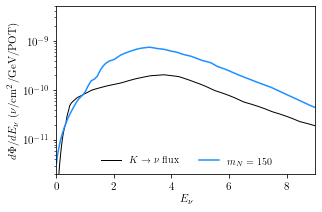

In [9]:
fig = plt.figure()
ax = fig.add_axes(axes_form)
USQR = 1

x=np.linspace(0,10,1000)

#\nu 
ax.plot(x,fK(x), label=r'$K\to\nu$ flux', color= 'black', lw = 1)
# ax.plot(x,fK(x), label=r'$K^+$ parent', color='orange')

MN = 0.150

ps191 = exp.experiment(exp.flag_ps191)
fpi_ps191 = ps191.get_flux_func(parent=lp.pi_plus)
fK_ps191 = ps191.get_flux_func(parent=lp.K_plus)

# aux_dEN = np.array([2*EN[0] - EN[1]]+EN.tolist()+[2*EN[-1] - EN[-2]])
# dEN = (aux_dEN[2:]-aux_dEN[:-2])/2

phiN_pi = hnl_tools.dphi_dEN_app(fpi_ps191, x, Ualpha4SQR=USQR, mN=MN, parent=lp.pi_plus, daughter=lp.mu_plus)
phiN_K = hnl_tools.dphi_dEN_app(fK_ps191, x, Ualpha4SQR=USQR, mN=MN, parent=lp.K_plus, daughter=lp.mu_plus)
# ax.plot(x,phiN_pi, label=r'$\pi^+ \to \mu^+ N$', ls='--', color= 'dodgerblue')
ax.plot(x,phiN_K, label=r'$m_N = 150$', ls='-', color='dodgerblue')


ax.set_xlabel(r"$E_\nu$")
ax.set_ylabel(r"$d\Phi/dE_\nu$ ($\nu$/cm$^2$/GeV/POT)")
ax.set_yscale('log')
ax.set_ylim(2e-12,5e-9)
ax.set_xlim(0,9)
ax.legend(loc='lower center', frameon=False, ncol=2)
ax.patch.set_facecolor('None')
fig.savefig("plots/HNL_fluxes_mN_150_ps191.png", dpi=400)

M_N = 0.15, T2K = 3e-09, ours = 2.5e-09, ratio = 0.85
M_N = 0.25, T2K = 8.5e-09, ours = 3.7e-09, ratio = 0.44


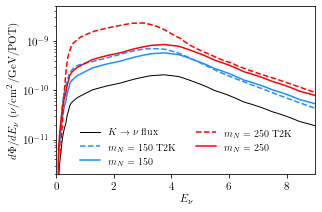

In [10]:
fig = plt.figure()
ax = fig.add_axes(axes_form)
USQR = 1

x=np.linspace(0,10,1000)

#\nu 
ax.plot(x,fK(x), label=r'$K\to\nu$ flux', color= 'black', lw = 1)
# ax.plot(x,fK(x), label=r'$K^+$ parent', color='orange')

MN = 0.150

EN, flux = np.genfromtxt("digitized/T2K_HNL_fluxes/m4_150_MeV_KmuN.dat", unpack = True)
ax.plot(EN,USQR*flux/1e21, label=r'$m_N = 150$ T2K', ls='--', color='dodgerblue')

aux_dEN = np.array([2*EN[0] - EN[1]]+EN.tolist()+[2*EN[-1] - EN[-2]])
dEN = (aux_dEN[2:]-aux_dEN[:-2])/2

# phiN_pi = hnl_tools.dphi_dEN_app(fpi, x, Ualpha4SQR=USQR, mN=MN, parent=lp.pi_plus, daughter=lp.mu_plus)
phiN_K = hnl_tools.dphi_dEN_app(fK, x, Ualpha4SQR=USQR, mN=MN, parent=lp.K_plus, daughter=lp.mu_plus)
# ax.plot(x,phiN_pi, label=r'$\pi^+ \to \mu^+ N$', ls='--', color= 'dodgerblue')
ax.plot(x,phiN_K, label=r'$m_N = 150$', ls='-', color='dodgerblue')

print(f'M_N = {MN}, T2K = {USQR*(flux*dEN).sum()/1e21:.2g}, '+\
      f'ours = {(x[1]-x[0])*phiN_K.sum():.2g}, '+\
      f'ratio = {(x[1]-x[0])*phiN_K.sum()/(USQR*(flux*dEN).sum()/1e21):.2g}')

      
MN = 0.250

EN, flux = np.genfromtxt("digitized/T2K_HNL_fluxes/m4_250_MeV_KmuN.dat", unpack = True)
ax.plot(EN,USQR*flux/1e21, label=r'$m_N = 250$ T2K', ls='--', color='red')

aux_dEN = np.array([2*EN[0] - EN[1]]+EN.tolist()+[2*EN[-1] - EN[-2]])
dEN = (aux_dEN[2:]-aux_dEN[:-2])/2

# phiN_pi = hnl_tools.dphi_dEN_app(fpi, x, Ualpha4SQR=USQR, mN=MN, parent=lp.pi_plus, daughter=lp.mu_plus)
phiN_K = hnl_tools.dphi_dEN_app(fK, x, Ualpha4SQR=USQR, mN=MN, parent=lp.K_plus, daughter=lp.mu_plus)
# ax.plot(x,phiN_pi, label=r'$\pi^+ \to \mu^+ N$', ls='--', color= 'dodgerblue')
ax.plot(x,phiN_K, label=r'$m_N = 250$', ls='-', color='red')


print(f'M_N = {MN}, T2K = {USQR*(flux*dEN).sum()/1e21:.2g}, '+\
      f'ours = {(x[1]-x[0])*phiN_K.sum():.2g}, '+\
      f'ratio = {(x[1]-x[0])*phiN_K.sum()/(USQR*(flux*dEN).sum()/1e21):.2g}')


ax.set_xlabel(r"$E_\nu$")
ax.set_ylabel(r"$d\Phi/dE_\nu$ ($\nu$/cm$^2$/GeV/POT)")
ax.set_yscale('log')
ax.set_ylim(2e-12,5e-9)
ax.set_xlim(0,9)
ax.legend(loc='lower center', frameon=False, ncol=2)
ax.patch.set_facecolor('None')
fig.savefig("plots/HNL_fluxes_mN_150.png", dpi=400)

## Decay Rates

### Ue4 mixing only

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


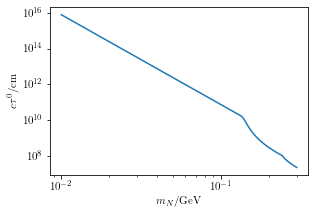

In [12]:
# Compute all the decay rates and branching ratios
M4=np.logspace(-2,np.log10(0.300),100)
USQR = 1e-6
ctaus=[]
for j in range(len(M4)):
    my_hnl = model.hnl_model(m4=M4[j], mixings={"Umu4SQR": USQR})
    my_hnl.set_high_level_variables()
    my_hnl.compute_rates()
    ctaus.append(my_hnl.ctau0)
ctaus=np.array(ctaus)

# Plotting
fig = plt.figure()
ax = fig.add_axes(axes_form)

ax.plot(M4,ctaus)
 
ax.set_xlabel(r"$m_N$/GeV")
ax.set_ylabel(r"$c\tau^0/$cm")
ax.set_xscale('log')
ax.set_yscale('log')

ax.legend(loc='lower left', frameon=False, ncol=1, fontsize=9)
ax.patch.set_facecolor('None')
fig.savefig("plots/lifetime_e-only.png", dpi=400)


In [15]:
# Compute all the decay rates and branching ratios
M4=np.logspace(-2,np.log10(0.4),100)
USQR = 1e-2

list_of_channels = ['nu_nu_nu','nu_e_e','nu_e_mu','nu_mu_mu','nu_pi','e_pi','mu_pi']
all_brs = np.empty((len(list_of_channels),len(M4)))

for j in range(len(M4)):
    my_hnl = model.hnl_model(m4=M4[j], mixings={"Umu4SQR": USQR})
    my_hnl.set_high_level_variables()
    my_hnl.compute_rates()
    for channel in list_of_channels:
        
        i = list_of_channels.index(channel)
        
        if channel in my_hnl.brs:
            all_brs[i,j] = my_hnl.brs[channel]
        else:
            all_brs[i,j] = 0.0

/Users/matheushostert/Repos/stdHNL/hnl_apps/const.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  return 1.0/G*invGeV_to_s
/Users/matheushostert/Repos/stdHNL/hnl_apps/const.py:144: RuntimeWarning: divide by zero encountered in double_scalars
  return 1.0/G*invGeV_to_cm


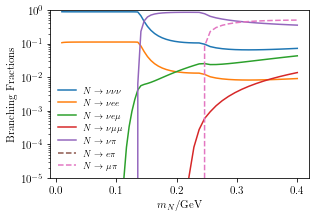

In [16]:
fig = plt.figure()
ax = fig.add_axes(axes_form)

for channel in list_of_channels:
    i = list_of_channels.index(channel)
    label=f'$N\\to {channel}$'.replace("_", " ").replace("nu", '\\nu').replace("mu", '\\mu').replace("pi", '\\pi')
    
    if channel[:2] != "nu":
        s='--'
    else:
        s='-'
    
    ax.plot(M4, all_brs[i,:], label=label, linestyle=s)
            
ax.set_xlabel(r"$m_N$/GeV")
ax.set_ylabel(r"Branching Fractions")
ax.set_yscale('log')
ax.set_ylim(1e-5,1)
ax.legend(loc='lower left', frameon=False, ncol=1,fontsize=9)
ax.patch.set_facecolor('None')
fig.savefig("plots/Branching_ratios_e-only.png", dpi=400)

### Umu4

In [17]:
my_hnl = model.hnl_model(m4=0.350, mixings={"Umu4SQR": USQR})
my_hnl.set_high_level_variables()
my_hnl.compute_rates()
print(my_hnl.ctau0,my_hnl.rates['nu_pi'])

1099.4269875108728 7.105760785812712e-18


/Users/matheushostert/Repos/stdHNL/hnl_apps/const.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  return 1.0/G*invGeV_to_s
/Users/matheushostert/Repos/stdHNL/hnl_apps/const.py:144: RuntimeWarning: divide by zero encountered in double_scalars
  return 1.0/G*invGeV_to_cm


In [18]:
# Compute all the decay rates and branching ratios
M4=np.logspace(-2,np.log10(0.300),100)
USQR = 1e-4
ctaus=[]
for j in range(len(M4)):
    my_hnl = model.hnl_model(m4=M4[j], mixings={"Umu4SQR": USQR})
    my_hnl.set_high_level_variables()
    my_hnl.compute_rates()
    ctaus.append(my_hnl.ctau0)
ctaus=np.array(ctaus)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


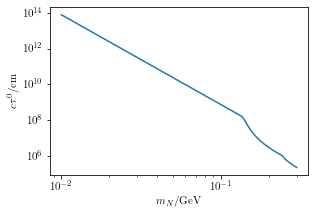

In [19]:
fig = plt.figure()
ax = fig.add_axes(axes_form)

ax.plot(M4,ctaus)
 
ax.set_xlabel(r"$m_N$/GeV")
ax.set_ylabel(r"$c\tau^0/$cm")
ax.set_xscale('log')
ax.set_yscale('log')
# ax.set_ylim(1e-5,1)
ax.legend(loc='lower left', frameon=False, ncol=1,fontsize=9)
ax.patch.set_facecolor('None')
fig.savefig("plots/lifetime_mu-only.png", dpi=400)

In [20]:
# Compute all the decay rates and branching ratios
M4=np.logspace(-2,np.log10(0.300),200)
USQR = 1e-2

list_of_channels = ['nu_nu_nu','nu_e_e','nu_e_mu','nu_mu_mu','nu_pi','e_pi','mu_pi']
all_brs = np.empty((len(list_of_channels),len(M4)))

for j in range(len(M4)):
    my_hnl = model.hnl_model(m4=M4[j], mixings={"Umu4SQR": USQR})
    my_hnl.set_high_level_variables()
    my_hnl.compute_rates()
    for channel in list_of_channels:
        i = list_of_channels.index(channel)
        
        if channel in my_hnl.brs:
            all_brs[i,j] = my_hnl.brs[channel]
        else:
            all_brs[i,j] = 0.0

/Users/matheushostert/Repos/stdHNL/hnl_apps/const.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  return 1.0/G*invGeV_to_s
/Users/matheushostert/Repos/stdHNL/hnl_apps/const.py:144: RuntimeWarning: divide by zero encountered in double_scalars
  return 1.0/G*invGeV_to_cm


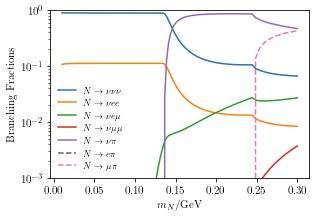

In [21]:
fig = plt.figure()
ax = fig.add_axes(axes_form)

for channel in list_of_channels:
    i = list_of_channels.index(channel)
    label=f'$N\\to {channel}$'.replace("_", " ").replace("nu", '\\nu').replace("mu", '\\mu').replace("pi", '\\pi')
    
    if channel[:2] != "nu":
        s='--'
    else:
        s='-'
    
    ax.plot(M4, all_brs[i,:], label=label, linestyle=s)
            
ax.set_xlabel(r"$m_N$/GeV")
ax.set_ylabel(r"Branching Fractions")
ax.set_yscale('log')
ax.set_ylim(1e-3,1)
ax.legend(loc='lower left', frameon=False, ncol=1,fontsize=9)
ax.patch.set_facecolor('None')
fig.savefig("plots/Branching_ratios_mu-only.png", dpi=400)

### Turning on the dipole at the top tip of the Supernova bound

In [22]:
USQR = 1e-14
dmu4=5e-7
my_hnl = model.hnl_model(m4=0.100, mixings={"Umu4SQR": USQR}, dipoles={"dip_mu4": dmu4})
my_hnl.set_high_level_variables()
my_hnl.compute_rates()
print(my_hnl.brs['nu_e_e']*100)
print(my_hnl.brs['nu_mu_mu']*100)
print(my_hnl.rates['nu_e_e']/my_hnl.rates['nu_mu_mu'])

0.5814352408124274
0.0
inf


/Users/matheushostert/Repos/stdHNL/hnl_apps/const.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  return 1.0/G*invGeV_to_s
/Users/matheushostert/Repos/stdHNL/hnl_apps/const.py:144: RuntimeWarning: divide by zero encountered in double_scalars
  return 1.0/G*invGeV_to_cm
/var/folders/my/7j7cn6f92_z66yvbb11lgt2r0000gn/T/ipykernel_21712/3293193830.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  print(my_hnl.rates['nu_e_e']/my_hnl.rates['nu_mu_mu'])


In [23]:
# Compute all the decay rates and branching ratios
M4=np.linspace(0.01,0.5,1000)
USQR = 1e-6
dmu4 = 5e-7 # GeV^-1

list_of_channels = ['nu_gamma','nu_nu_nu','nu_e_e','nu_e_mu','nu_mu_mu','nu_pi','e_pi','mu_pi']
all_brs = np.empty((len(list_of_channels),len(M4)))

for j in range(len(M4)):
    my_hnl = model.hnl_model(m4=M4[j], mixings={"Umu4SQR": USQR}, dipoles={"dip_mu4": dmu4})
    my_hnl.set_high_level_variables()
    my_hnl.compute_rates()
    for channel in list_of_channels:
        i = list_of_channels.index(channel)
        
        if channel in my_hnl.brs:
            all_brs[i,j] = my_hnl.brs[channel]
        else:
            all_brs[i,j] = 0.0

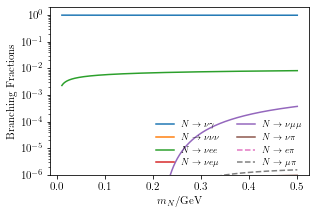

In [24]:
fig = plt.figure()
ax = fig.add_axes(axes_form)

for channel in list_of_channels:
    i = list_of_channels.index(channel)
    label=f'$N\\to {channel}$'.replace("_", " ").replace("nu", '\\nu').replace("mu", '\\mu').replace("pi", '\\pi').replace("gamma", '\\gamma')
    
    if channel[:2] != "nu":
        s='--'
    else:
        s='-'
    
    ax.plot(M4, all_brs[i,:], label=label, linestyle=s)
            
ax.set_xlabel(r"$m_N$/GeV")
ax.set_ylabel(r"Branching Fractions")
ax.set_yscale('log')
ax.set_ylim(1e-6,2)
ax.legend(loc='lower right', frameon=False, ncol=2,fontsize=9)
ax.patch.set_facecolor('None')
fig.savefig("plots/Branching_ratios_mudipole.png", dpi=400)

### Now turning on the dark Z'

In [25]:
# Compute all the decay rates and branching ratios
M4=np.linspace(0.15,0.4,1000)
USQR = 1e-4

list_of_channels = ['nu_gamma','nu_nu_nu','nu_e_e','nu_e_mu','nu_mu_mu','nu_pi','e_pi','mu_pi']
all_brs = np.empty((len(list_of_channels),len(M4)))

for j in range(len(M4)):
    my_hnl = model.hnl_model(m4=M4[j], mixings={"Umu4SQR": USQR}, dark_coupl={'GX': 100*Gf})
    my_hnl.set_high_level_variables()
    my_hnl.compute_rates()
    for channel in list_of_channels:
        i = list_of_channels.index(channel)
        
        if channel in my_hnl.brs:
            all_brs[i,j] = my_hnl.brs[channel]
        else:
            all_brs[i,j] = 0.0

/Users/matheushostert/Repos/stdHNL/hnl_apps/const.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  return 1.0/G*invGeV_to_s
/Users/matheushostert/Repos/stdHNL/hnl_apps/const.py:144: RuntimeWarning: divide by zero encountered in double_scalars
  return 1.0/G*invGeV_to_cm


In [26]:
my_hnl.rates_alp

{'e_e': 0.0, 'mu_mu': 0.0, 'gamma_gamma': 0.0}

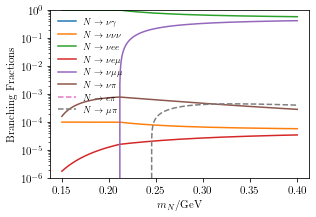

In [28]:
fig = plt.figure()
ax = fig.add_axes(axes_form)

for channel in list_of_channels:
    i = list_of_channels.index(channel)
    label=f'$N\\to {channel}$'.replace("_", " ").replace("nu", '\\nu').replace("mu", '\\mu').replace("pi", '\\pi').replace("gamma", '\\gamma')
    
    if channel[:2] != "nu":
        s='--'
    else:
        s='-'
    
    ax.plot(M4, all_brs[i,:], label=label, linestyle=s)
            
ax.set_xlabel(r"$m_N$/GeV")
ax.set_ylabel(r"Branching Fractions")
ax.set_yscale('log')
ax.set_ylim(1e-6,1)
ax.legend(loc='upper left', frameon=False, ncol=1,fontsize=9)
ax.patch.set_facecolor('None')
fig.savefig("plots/Branching_ratios_mu_Gx.png", dpi=400)

# Now turning on the ALP decays

In [38]:


# Compute all the decay rates and branching ratios
M4=np.linspace(0.01,0.4,1000)
USQR = 1e-6

list_of_channels = ['nu_gamma','nu_nu_nu','nu_e_e','nu_e_mu','nu_mu_mu','nu_pi','e_pi','mu_pi', 'nu_alp']
all_brs = np.empty((len(list_of_channels),len(M4)))

for j in range(len(M4)):
    my_hnl = model.hnl_model(m4=M4[j], mixings={"Umu4SQR": USQR}, dark_coupl={'inv_f_alp': 1e-2, 'c_N': 0.4, 'c_e': 1.0, 'm_alp': 0.2})
    my_hnl.set_high_level_variables()
    my_hnl.compute_rates()
    for channel in list_of_channels:
        i = list_of_channels.index(channel)
        
        if channel in my_hnl.brs:
            all_brs[i,j] = my_hnl.brs[channel]
        else:
            all_brs[i,j] = 0.0

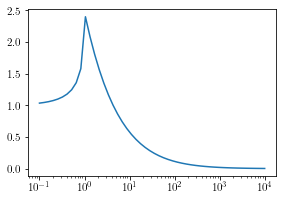

In [39]:
# alp loop coupling to gamma gamma
from hnl_apps.rates import F_alp_loop
x=np.geomspace(0.1,10000)
plt.plot(x, np.abs(F_alp_loop(x)))
plt.xscale("log")

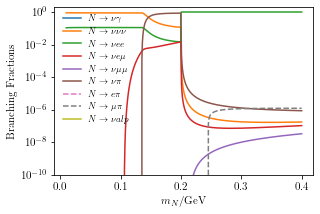

In [40]:
fig = plt.figure()
ax = fig.add_axes(axes_form)

for channel in list_of_channels:
    i = list_of_channels.index(channel)
    label=f'$N\\to {channel}$'.replace("_", " ").replace("nu", '\\nu').replace("mu", '\\mu').replace("pi", '\\pi').replace("gamma", '\\gamma')
    if channel[:2] != "nu":
        s='--'
    else:
        s='-'

    ax.plot(M4, all_brs[i,:], label=label, linestyle=s)
            
ax.set_xlabel(r"$m_N$/GeV")
ax.set_ylabel(r"Branching Fractions")
ax.set_yscale('log')
ax.set_ylim(1e-10,2)
ax.set_ylim(1e-10,2)
ax.legend(loc='upper left', frameon=False, ncol=1,fontsize=9)
ax.patch.set_facecolor('None')
fig.savefig("plots/Branching_ratios_mu_alp.png", dpi=400)

### Compute number of decays in TPCs

Checking the scaling of the number of events with the additional dark sector parameters like $d_{\mu4}$ and $G_X$.

In [45]:
# tests
rate_d=[]
rate_gx=[]
rate_alp=[]
rate_d_PS191=[]
rate_gx_PS191=[]
rate_alp_PS191=[]
dipole_range=np.logspace(-12,-1,20)
gx_range=np.logspace(-1,6,30)
inv_f_range=np.logspace(-8,1,20)
for d in dipole_range:
    rate_d.append(hnl_tools.get_event_rate((0.1, 1e-6), flavor_struct=[0.0,1.0,0.0], dipoles={"dip_mu4": d}, detector=exp.nd280))
    rate_d_PS191.append(hnl_tools.get_event_rate((0.1, 1e-6), flavor_struct=[0.0,1.0,0.0], dipoles={"dip_mu4": d}, detector=ps191))
for gx in gx_range:
    rate_gx.append(hnl_tools.get_event_rate((0.1, 1e-6), flavor_struct=[0.0,1.0,0.0], dark_coupl={"GX": gx*Gf}, detector=exp.nd280))
    rate_gx_PS191.append(hnl_tools.get_event_rate((0.1, 1e-6), flavor_struct=[0.0,1.0,0.0], dark_coupl={"GX": gx*Gf}, detector=exp.ps191))
for inv_f in inv_f_range:
    rate_alp.append(hnl_tools.get_event_rate((0.1, 1e-8), flavor_struct=[0.0,1.0,0.0], dark_coupl={"inv_f_alp": inv_f, 'c_N': 0.4, 'c_e': 0.4, 'm_alp': 0.02}, detector=exp.nd280))
    rate_alp_PS191.append(hnl_tools.get_event_rate((0.1, 1e-8), flavor_struct=[0.0,1.0,0.0], dark_coupl={"inv_f_alp": inv_f, 'c_N': 0.4, 'c_e': 0.4, 'm_alp': 0.02}, detector=exp.ps191))


/Users/matheushostert/Repos/stdHNL/hnl_apps/const.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  return 1.0/G*invGeV_to_s
/Users/matheushostert/Repos/stdHNL/hnl_apps/const.py:144: RuntimeWarning: divide by zero encountered in double_scalars
  return 1.0/G*invGeV_to_cm


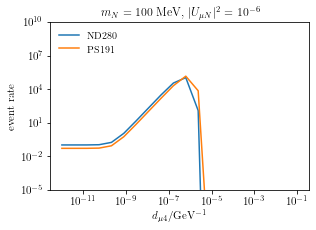

In [75]:
fig = plt.figure()
ax = fig.add_axes(axes_form)

ax.plot(dipole_range, rate_d, label='ND280')
ax.plot(dipole_range, rate_d_PS191, label='PS191')
ax.set_ylim(1e-5,1e10)

ax.set_xlabel(r"$d_{\mu 4}/$GeV$^{-1}$")
ax.set_ylabel(r"event rate")
ax.set_title(f"$m_N = 100$~MeV,  $|U_{{\mu N}}|^2 = 10^{{-6}}$")
ax.set_xscale("log")
ax.set_yscale("log")
ax.legend(loc="upper left", frameon=False)
fig.savefig("plots/Event_rate_w_dipole.png", dpi=400)

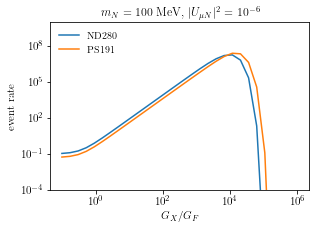

In [74]:
fig = plt.figure()
ax = fig.add_axes(axes_form)

ax.plot(gx_range, rate_gx, label='ND280')
ax.plot(gx_range, rate_gx_PS191, label='PS191')
ax.set_ylim(1e-4,1e10)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_title(f"$m_N = 100$~MeV,  $|U_{{\mu N}}|^2 = 10^{{-6}}$")

ax.set_xlabel(r"$G_X/G_F$")
ax.set_ylabel(r"event rate")
ax.legend(loc="upper left", frameon=False)

fig.savefig("plots/Event_rate_w_GX.png", dpi=400)

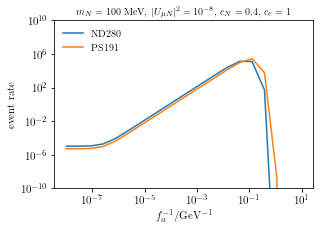

In [61]:
fig = plt.figure()
ax = fig.add_axes(axes_form)

ax.plot(inv_f_range, rate_alp, label='ND280')
ax.plot(inv_f_range, rate_alp_PS191, label='PS191')
ax.set_ylim(1e-10,1e10)

ax.set_xlabel(r"$f_{a}^{-1}/$GeV$^{-1}$")
ax.set_ylabel(r"event rate")

ax.set_xscale("log")
ax.set_yscale("log")
ax.set_title(f"$m_N = 100$~MeV,  $|U_{{\mu N}}|^2 = 10^{{-8}}$, $c_N = 0.4$, $c_e = 1$", fontsize=10)

ax.legend(loc="upper left", frameon=False)
fig.savefig("plots/Event_rate_w_dipole.png", dpi=400)

### Comparing bounds on HNLs and scalars

In [62]:
# check of PS191 bound

M = 0.150
GammaN = Gf**2*M**5/192/np.pi**3
GammaPhi= M*m_e**2*Gf/4/np.sqrt(2)/np.pi
BrKmu=0.64
BrKpi=1.4e-3

R=(2.4e-7)**2*(BrKmu/BrKpi) * (GammaN/GammaPhi)
print(rf"PS191 bound on theta from the official HNL limit. We find \theta < { R**(1/4):.4e}")

PS191 bound on theta from the official HNL limit. We find \theta < 2.0533e-04


In [63]:
# bound on HNLs at T2K 

M = 0.15
GammaN = (1-4*s2w+8*s2w**2)*Gf**2*M**5/768/np.pi**3
GammaPhi= M*m_e**2*Gf/4/np.sqrt(2)/np.pi
BrKmu=0.64
BrKpi=1.4e-3

R = (1e-6)**2*(BrKmu/BrKpi)*(GammaN/GammaPhi)/2
print(rf"T2K bound on theta from the official HNL limit. We find \theta < { R**(1/4):.4e}")

T2K bound on theta from the official HNL limit. We find \theta < 2.1015e-04


Getting MicroBooNE's bounds on $|U_{\mu 4}|^2$ from their bounds on $\theta$

checking that it matches what Kelly and Machado find. For this step, we consider a Majorana HNL.

In [64]:

M = 0.02
GammaN = 2*(1-4*s2w+8*s2w**2)*Gf**2*M**5/768/np.pi**3
GammaPhi= M*m_e**2*Gf/4/np.sqrt(2)/np.pi
BrKmu=0.64
BrKpi=1.4e-3

R = (2e-3)**4*(BrKpi/BrKmu)*(GammaPhi/GammaN)
print(f"|Umu4|^2 < {R**(1/2):.4e}")

|Umu4|^2 < 2.5473e-03


In [65]:
# Comparing T2K efficiencies and MicroBooNE efficiencies

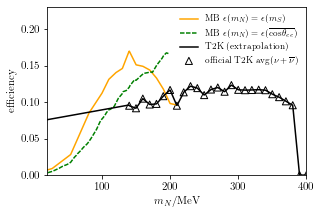

In [66]:
## MicroBooNE's efficiency for scalar
ms_mu, eff_mu, limit_theta, *_ = np.genfromtxt("digitized/microboone_higgs/supplemental_table.dat", unpack = True)
eff_mu_f = interpolate.interp1d(ms_mu*1e-3, eff_mu/100, bounds_error=False, fill_value=np.nan)

## MicroBooNE's efficiency for HNL from average cos(theta_ee)
m4, Umu4sq = np.genfromtxt('digitized/muboone_kelly_machado/PS_eff_avg.dat', unpack=True)
favg = interpolate.interp1d(m4*1e-3, np.log10(Umu4sq), kind='linear', bounds_error=False, fill_value=np.nan, assume_sorted=False)    
m4, Umu4sq = np.genfromtxt('digitized/muboone_kelly_machado/PS_eff_scalar.dat', unpack=True)
fS = interpolate.interp1d(m4*1e-3, np.log10(Umu4sq), kind='linear', bounds_error=False, fill_value=np.nan, assume_sorted=False)    

#### 
fig,ax = std_fig()

x = np.linspace(0, 0.5, 1000)

l2 = ax.plot(x*1e3, eff_mu_f(x), lw=1.5, c='orange', label=r"MB $\epsilon(m_{N}) = \epsilon(m_S)$")
l3 = ax.plot(x*1e3, eff_mu_f(x)/(10**favg(x)/10**fS(x))**2, c='green', dashes=(3,1), lw=1.5, label=r"MB $\epsilon(m_{N}) = \epsilon(\overline{\cos{\theta_{ee}}})$")
l1 = ax.plot(x*1e3, nd280.prop['eff_nu_e_e'](x), c='black', label='T2K (extrapolation)')
l4 = ax.scatter(nd280.masses_t2k,nd280.eff, lw=1, marker='^', s=50, edgecolor='black', facecolor='None', 
                    label=r'official T2K avg($\nu+\overline{\nu}$)')



ax.set_ylabel(r"efficiency")
ax.set_xlabel(r"$m_N$/MeV")
ax.set_ylim(0,0.23)
ax.set_xlim(20,400)

ax.legend(frameon=False, fontsize=9, loc='upper right', ncol=1)

fig.savefig("plots/efficiency_comparison.png", dpi=400)
fig.savefig("plots/efficiency_comparison.pdf")

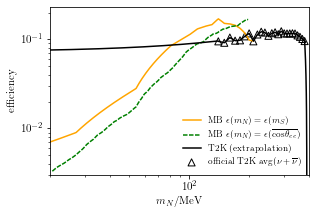

In [73]:
## MicroBooNE's efficiency for scalar
ms_mu, eff_mu, limit_theta, *_ = np.genfromtxt("digitized/microboone_higgs/supplemental_table.dat", unpack = True)
eff_mu_f = interpolate.interp1d(ms_mu*1e-3, eff_mu/100, bounds_error=False, fill_value=np.nan)

## MicroBooNE's efficiency for HNL from average cos(theta_ee)
m4, Umu4sq = np.genfromtxt('digitized/muboone_kelly_machado/PS_eff_avg.dat', unpack=True)
favg = interpolate.interp1d(m4*1e-3, np.log10(Umu4sq), kind='linear', bounds_error=False, fill_value=np.nan, assume_sorted=False)    
m4, Umu4sq = np.genfromtxt('digitized/muboone_kelly_machado/PS_eff_scalar.dat', unpack=True)
fS = interpolate.interp1d(m4*1e-3, np.log10(Umu4sq), kind='linear', bounds_error=False, fill_value=np.nan, assume_sorted=False)    

#### 
fig,ax = std_fig()

x = np.linspace(0, 0.5, 1000)

l2 = ax.plot(x*1e3, eff_mu_f(x), lw=1.5, c='orange', label=r"MB $\epsilon(m_{N}) = \epsilon(m_S)$")
l3 = ax.plot(x*1e3, eff_mu_f(x)/(10**favg(x)/10**fS(x))**2, c='green', dashes=(3,1), lw=1.5, label=r"MB $\epsilon(m_{N}) = \epsilon(\overline{\cos{\theta_{ee}}})$")
l1 = ax.plot(x*1e3, nd280.prop['eff_nu_e_e'](x), c='black', label='T2K (extrapolation)')
l4 = ax.scatter(nd280.masses_t2k,nd280.eff, lw=1, marker='^', s=50, edgecolor='black', facecolor='None', 
                    label=r'official T2K avg($\nu+\overline{\nu}$)')



ax.set_ylabel(r"efficiency")
ax.set_xlabel(r"$m_N$/MeV")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(3e-3,0.23)
ax.set_xlim(20,400)

ax.legend(frameon=False, fontsize=9, loc='lower right', ncol=1)

fig.savefig("plots/efficiency_comparison_log.png", dpi=400)
fig.savefig("plots/efficiency_comparison_log.pdf")

In [76]:
hnl_tools.get_event_rate((0.1, 5e-10), flavor_struct=[0.0,1.0,0.0], dark_coupl={"inv_f_alp": 1e-2, 'c_N': 0.4, 'c_e': 1, 'm_alp': 0.02}, detector=exp.nd280)

33.35422479360182